<a href="https://colab.research.google.com/github/nandakumar92/datacamp/blob/main/Joining_Data_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
ward=pd.read_pickle('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/ward.p')

In [3]:
census=pd.read_pickle('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/census.p')

In [4]:
ward.head(1)

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647


In [5]:
census.head(1)

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647


In [7]:
## join df
df=ward.merge(census,on='ward',how='inner')
df.head(1)

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647


In [8]:
## use suffix
df=ward.merge(census,on='ward',how='inner',suffixes=['_ward','_census'])
df.head(1)

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_census,zip_census
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647


In [9]:
df.shape

(50, 9)

In [10]:
licenses=pd.read_pickle('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/licenses.p')

In [15]:
## three way merge
df=ward.merge(census,on='ward',how='inner').merge(licenses,on='ward',how='inner',suffixes=['_ward','_licenses'])
df.head(1)

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y,account,aid,business,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622


In [17]:
stations=pd.read_pickle('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/stations.p')
cal=pd.read_pickle('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/cta_calendar.p')
rides=pd.read_pickle('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/cta_ridership.p')

In [22]:
ridership_cal=rides.merge(cal,on='day',suffixes=['_rides','_cal']).merge(stations,on='station_id')
ridership_cal.head(1)

,station_id,year_rides,month_rides,day,rides,year_cal,month_cal,day_type,station_name,location
0,40010,2019,1,1,576,2019,1,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"


In [23]:
## self join
df=ridership_cal.merge(ridership_cal,on='day',how='left')
df.head(1)

,station_id_x,year_rides_x,month_rides_x,day,rides_x,year_cal_x,month_cal_x,day_type_x,station_name_x,location_x,station_id_y,year_rides_y,month_rides_y,rides_y,year_cal_y,month_cal_y,day_type_y,station_name_y,location_y
0,40010,2019,1,1,576,2019,1,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)",40010,2019,1,576,2019,1,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"


In [27]:
movies=pd.read_pickle('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/movies.p')
sequels=pd.read_pickle('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/sequels.p')

In [30]:
sequels.head(1)

,id,title,sequel
0,19995,Avatar,<NA>


In [31]:
## find movies all their sequels in single row
sequels.merge(sequels,left_on='sequel',right_on='id',how='left')

,id_x,title_x,sequel_x,id_y,title_y,sequel_y
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>
...,...,...,...,...,...,...
4798,133931,Zambezia,<NA>,<NA>,NaN,<NA>
4799,309503,Zipper,<NA>,<NA>,NaN,<NA>
4800,34592,ZMD: Zombies of Mass Destruction,<NA>,<NA>,NaN,<NA>
4801,206213,Zombie Hunter,<NA>,<NA>,NaN,<NA>


In [36]:
## semi join using isin on two tables
sequels[sequels['id'].isin(movies['id'])]

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>
...,...,...,...
4798,133931,Zambezia,<NA>
4799,309503,Zipper,<NA>
4800,34592,ZMD: Zombies of Mass Destruction,<NA>
4801,206213,Zombie Hunter,<NA>


In [47]:
## concatenating
sq1=sequels[:5]
sq2=sequels[5:10]
df=pd.concat([sq1,sq2])
df.shape
df.head(5)

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [48]:
## ignore index to maintain natural index range
df=pd.concat([sq1,sq2],ignore_index=True)
df.head(5)

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [53]:
## use keys to separately show different dataframes
df=pd.concat([sq1,sq2],ignore_index=False,keys=['sq1','sq2'])
df

id                    title  sequel
sq1 0   19995                   Avatar    <NA>
    1     862                Toy Story     863
    2     863              Toy Story 2   10193
    3     597                  Titanic    <NA>
    4   24428             The Avengers    <NA>
sq2 5  135397           Jurassic World    <NA>
    6  168259                Furious 7    <NA>
    7   99861  Avengers: Age of Ultron    <NA>
    8  109445                   Frozen    <NA>
    9   68721               Iron Man 3    <NA>

In [56]:
## concatenating with different columns numbers , pandas automatically adds n/a values
sq1=sequels[:5]
sq2=sequels[['id','title']][5:10]
df=pd.concat([sq1,sq2])
df

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>
5,135397,Jurassic World,<NA>
6,168259,Furious 7,<NA>
7,99861,Avengers: Age of Ultron,<NA>
8,109445,Frozen,<NA>
9,68721,Iron Man 3,<NA>


In [59]:
## add join condition to concatenate only matching columns
sq1=sequels[:5]
sq2=sequels[['id','title']][5:10]
df=pd.concat([sq1,sq2],join='inner')
df

,id,title
0,19995,Avatar
1,862,Toy Story
2,863,Toy Story 2
3,597,Titanic
4,24428,The Avengers
5,135397,Jurassic World
6,168259,Furious 7
7,99861,Avengers: Age of Ultron
8,109445,Frozen
9,68721,Iron Man 3


In [61]:
## verifying integerity, pandas merge can be used to validate one to one , one to many conditions.
sq1.merge(sq2,on='id',validate='one_to_one')

,id,title_x,sequel,title_y


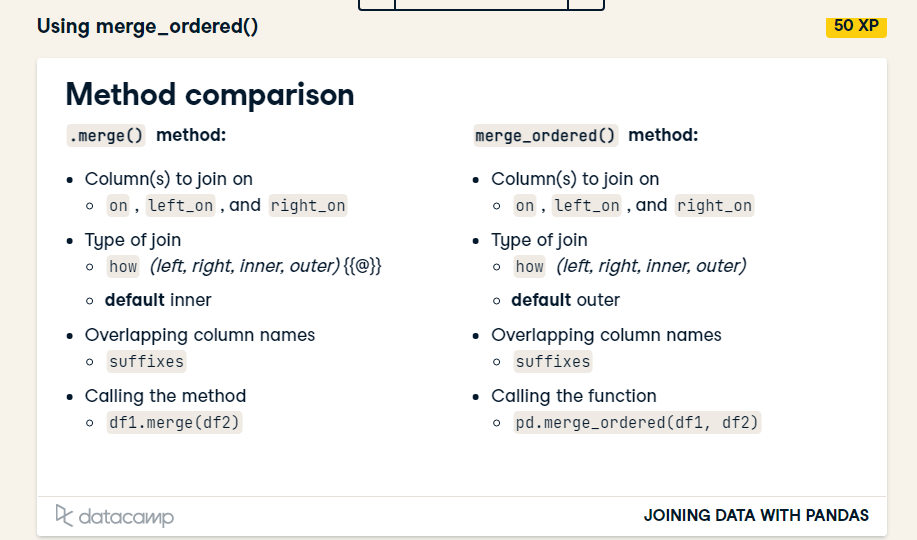

In [63]:
## use merge ordered to merge and sort at same time. Default join type is outer.
df=pd.read_csv('/content/drive/MyDrive/Colab/Data/Joining Data with pandas/S&P500.csv')
df.head(5)

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [68]:
df1=df[df.Date.isin([2008,2009])]
df2=df[df.Date.isin([2010,2011])]
df3=pd.merge_ordered(df1,df2,on='Date')
df3

,Date,Returns_x,Returns_y
0,2008,-38.49,NaN
1,2009,23.45,NaN
2,2010,NaN,12.78
3,2011,NaN,0.00


In [70]:
## using fill method to fill na values
df3=pd.merge_ordered(df1,df2,on='Date',fill_method='ffill')
df3

,Date,Returns_x,Returns_y
0,2008,-38.49,NaN
1,2009,23.45,NaN
2,2010,23.45,12.78
3,2011,23.45,0.00


In [81]:
## merge as of will select data from right table which is nearest(backward, forward or nearest) to left key value. 
quotes = pd.DataFrame(
    {
        "time": [
            pd.Timestamp("2016-05-25 13:30:00.021"),
            pd.Timestamp("2016-05-25 13:30:00.021"),
            pd.Timestamp("2016-05-25 13:30:00.030"),
            pd.Timestamp("2016-05-25 13:30:00.041"),
            pd.Timestamp("2016-05-25 13:30:00.048"),
            pd.Timestamp("2016-05-25 13:30:00.049"),
            pd.Timestamp("2016-05-25 13:30:00.072"),
            pd.Timestamp("2016-05-25 13:30:00.075")
        ],
        "ticker": [
               "GOOG",
               "MSFT",
               "MSFT",
               "MSFT",
               "GOOG",
               "AAPL",
               "GOOG",
               "MSFT"
           ],
           "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99, 720.50, 52.01],
           "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01, 720.88, 52.03]
    }
)

quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.021,GOOG,720.50,720.93
1,2016-05-25 13:30:00.021,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [73]:
trades = pd.DataFrame(
       {
           "time": [
               pd.Timestamp("2016-05-25 13:30:00.023"),
               pd.Timestamp("2016-05-25 13:30:00.038"),
               pd.Timestamp("2016-05-25 13:30:00.048"),
               pd.Timestamp("2016-05-25 13:30:00.048"),
               pd.Timestamp("2016-05-25 13:30:00.048")
           ],
           "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
           "price": [51.95, 51.95, 720.77, 720.92, 98.0],
           "quantity": [75, 155, 100, 100, 100]
       }
   )
trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [82]:
### to get the bid and ask price at time of trade, we use merge as of to select the closest time for bid/ask. Using merge will exclude data, but
### merge as of can be used to select nearest data available.
df=pd.merge_asof(trades,quotes,on=['time'],direction='backward')
df

,time,ticker_x,price,quantity,ticker_y,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,MSFT,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,MSFT,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,GOOG,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,GOOG,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,GOOG,720.50,720.93


In [83]:
## merge on antoher column before merging as of using on column
df=pd.merge_asof(trades,quotes,on=['time'],by='ticker',direction='backward')
df

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [88]:
## using tolerance to adjust as of limits
df=pd.merge_asof(trades,quotes,on=['time'],by='ticker',direction='backward',tolerance=pd.Timedelta("1ms"))
df

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,NaN,NaN
1,2016-05-25 13:30:00.038,MSFT,51.95,155,NaN,NaN
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.5,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.5,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN
